Student Details

Name:Michel Danjou

ID:18263461

Etivity 4

All necessary imports are provided. Please do not add further imports.

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

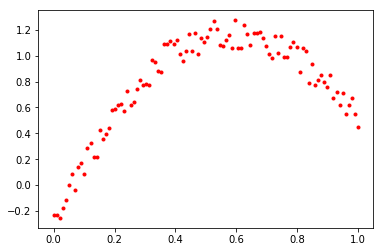

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]

lambdas = np.linspace(0,1,1000)
#lambdas = np.logspace(-10, 0, num=1000)  

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Correct results including plots. The chosen lambdas may not cover the range [0,1] appropriately and plots may not show very clear examples of over/underfitting.
  * Exemplary: Correct results, suitable range of <=1000 lambdas, plots clearly showing under+overfitting.

In [9]:
def plot_Eout_Ein_vs_lambda(lambda_min, lambda_max):
    # plot ein, eout for lambda > 0
    plt.plot(lambdas[:],ein[:], label='ein')
    plt.plot(lambdas[:],eout[:], label='eout')

    plt.xlim(lambda_min, lambda_max)

    plt.xlabel("lambdas")
    plt.ylabel("error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.title("Ein and Eout for lambda >= 0")

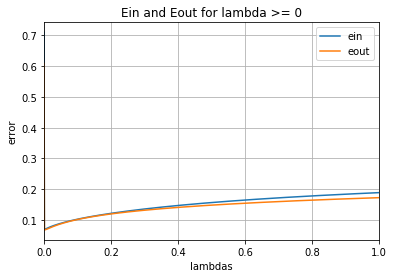

In [10]:
plot_Eout_Ein_vs_lambda(lambda_min=0, lambda_max=1)

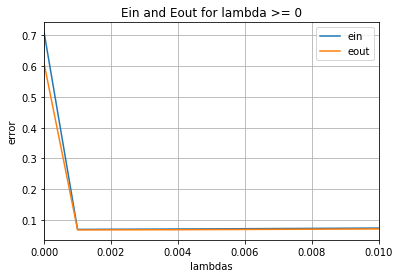

In [11]:
# Zoom in on the area where Eout is the smallest.
plot_Eout_Ein_vs_lambda(lambda_min=0, lambda_max=0.01)

### Observations:
The graph is showing both Ein and Eout. 

We can clearly see that:
  * Eout is high when lambda is 0, which corresponds to no regularization. 
  * Eout drops dramatically with a small value of lambda.
  * Both Eout and Ein start to increase as lambda grows.


In [12]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index          :", lowest_eout_index)
print("Best lambda used           :", best_lambda)
print("Eout without regularization:", eout[0])
print("Eout with regularization   :", eout[lowest_eout_index])
print("Difference                 :", eout[0] - eout[lowest_eout_index])

lowest_eout_index          : 1
Best lambda used           : 0.001001001001001001
Eout without regularization: 0.6089031518230476
Eout with regularization   : 0.06765691161921839
Difference                 : 0.5412462402038292


We notice a massive improvement for Eout after applying regularisation. I have ran this experiment multiple times and, although the results vary, we can see up to a 10 fold improvement on occasion.

# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

#### Rubric
See task 4.1 above

Text(0.5,1,'Eout by lambda (where lambda> 0)')

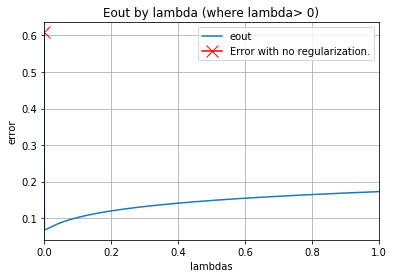

In [13]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Error with no regularization.")
plt.xlim(0,1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")


#### Observations
We can see that Eout is very high when lambda is 0, which is expected as it means there is no regularisation. The value of Eout(lambda=0) is represented with a <span style="color:red">red cross </span> on the above graph which can be seen on the top left part of the plot.

We can see an important improvement of Eout as soon as lambda starts to grow over 0. 
Eout then slowly increases as lambda grows.


In [14]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


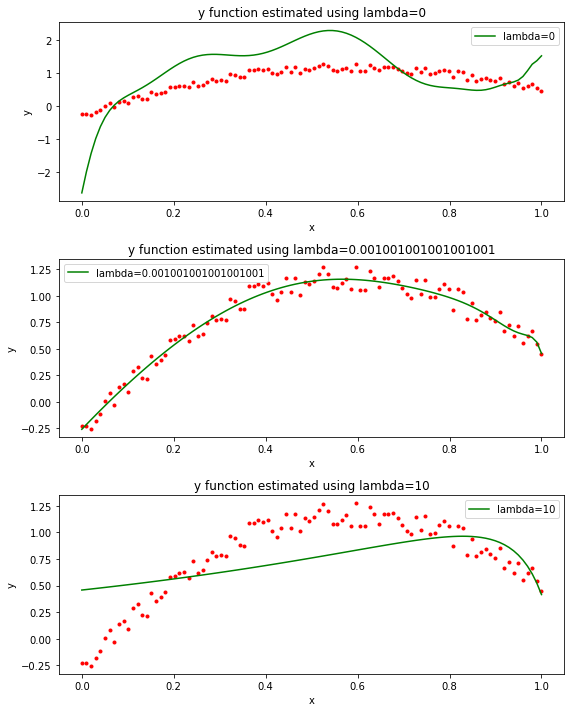

In [15]:
def experiment(order, l):

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



In [16]:
print("best lambda: ", best_lambda)

best lambda:  0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor. This is a case of over fitting.
  * for the optimum lambda, the polynomial estimates the target function very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function. This is a case of under fitting.


# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.
  
#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Full implementation of 10-fold CV yielding valid lambda and Eout.
  * Exemplary: Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.  

#### Implementation inspired by "Learning from Data" by Prof. Yaser S. Abu-Mostafa, p149, and  a review of Chelliah Kanthanathan's code.

#### Algorithm implemented:

Iterate over a large selection of lambda values between 0 and 1. 

For each lambda:
  * perform K-Fold cross validation.
  * Calculate Eout.
  * Keep the average Eout
  
Once all the lambdas are processed:
  * Find the lowest Eout and its corresponding lambda. This is the best lambda.
  * Calculate K-Fold once more to find the weights associated with the best lambda.
  
Plot the curve using the weight associated with the best lambda.  

In [17]:

def get_eval(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    Eval = np.mean(eout)
    print("Lambda:{} Eval: {}".format(l, Eval))
    return Eval


def experiment(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return ein[lowest_eout_index], eout[lowest_eout_index], weights[lowest_eout_index]
    


all_eval = []

for l in lambdas:
    my_eval = get_eval(50, l)
    all_eval.append(my_eval)

# Validation. Find the Eval and best lambda
lowest_eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))




Lambda:0.0 Eval: 3.7549828899850004
Lambda:0.001001001001001001 Eval: 0.07357605935570061
Lambda:0.002002002002002002 Eval: 0.07397563149138806
Lambda:0.003003003003003003 Eval: 0.07458681120900026
Lambda:0.004004004004004004 Eval: 0.07524765703556202
Lambda:0.005005005005005005 Eval: 0.07590003813833732
Lambda:0.006006006006006006 Eval: 0.07652312451097774
Lambda:0.007007007007007007 Eval: 0.07711103519231188
Lambda:0.008008008008008008 Eval: 0.07766405822593514
Lambda:0.009009009009009009 Eval: 0.07818492495422226
Lambda:0.01001001001001001 Eval: 0.07867716572485792
Lambda:0.011011011011011011 Eval: 0.07914437975259274
Lambda:0.012012012012012012 Eval: 0.07958992360946546
Lambda:0.013013013013013013 Eval: 0.0800167956951575
Lambda:0.014014014014014014 Eval: 0.08042761242453951
Lambda:0.015015015015015015 Eval: 0.08082462592432836
Lambda:0.016016016016016016 Eval: 0.08120975871585838
Lambda:0.017017017017017015 Eval: 0.0815846434341257
Lambda:0.018018018018018018 Eval: 0.0819506619150

Lambda:0.17917917917917917 Eval: 0.11887155196477847
Lambda:0.18018018018018017 Eval: 0.11903790707333009
Lambda:0.18118118118118118 Eval: 0.11920382129874615
Lambda:0.18218218218218218 Eval: 0.11936929722988106
Lambda:0.1831831831831832 Eval: 0.11953433741576247
Lambda:0.1841841841841842 Eval: 0.11969894436651358
Lambda:0.18518518518518517 Eval: 0.11986312055426449
Lambda:0.18618618618618618 Eval: 0.12002686841404493
Lambda:0.1871871871871872 Eval: 0.12019019034464382
Lambda:0.1881881881881882 Eval: 0.1203530887094636
Lambda:0.1891891891891892 Eval: 0.12051556583733276
Lambda:0.19019019019019018 Eval: 0.12067762402332458
Lambda:0.19119119119119118 Eval: 0.12083926552953095
Lambda:0.1921921921921922 Eval: 0.12100049258583676
Lambda:0.1931931931931932 Eval: 0.12116130739066197
Lambda:0.1941941941941942 Eval: 0.12132171211169887
Lambda:0.19519519519519518 Eval: 0.12148170888661163
Lambda:0.1961961961961962 Eval: 0.1216412998237412
Lambda:0.1971971971971972 Eval: 0.12180048700277948
Lambd

Lambda:0.3383383383383383 Eval: 0.1409064771797342
Lambda:0.33933933933933935 Eval: 0.14102205957157493
Lambda:0.34034034034034033 Eval: 0.1411374038104244
Lambda:0.34134134134134136 Eval: 0.14125251064047428
Lambda:0.34234234234234234 Eval: 0.14136738080298608
Lambda:0.3433433433433433 Eval: 0.1414820150363146
Lambda:0.34434434434434436 Eval: 0.1415964140759309
Lambda:0.34534534534534533 Eval: 0.1417105786544394
Lambda:0.34634634634634637 Eval: 0.14182450950159697
Lambda:0.34734734734734735 Eval: 0.141938207344335
Lambda:0.3483483483483483 Eval: 0.14205167290677537
Lambda:0.34934934934934936 Eval: 0.14216490691025113
Lambda:0.35035035035035034 Eval: 0.1422779100733242
Lambda:0.35135135135135137 Eval: 0.1423906831118029
Lambda:0.35235235235235235 Eval: 0.14250322673875962
Lambda:0.3533533533533533 Eval: 0.14261554166454954
Lambda:0.35435435435435436 Eval: 0.14272762859682558
Lambda:0.35535535535535534 Eval: 0.14283948824055723
Lambda:0.3563563563563564 Eval: 0.14295112129804616
Lambda:

Lambda:0.5305305305305306 Eval: 0.15946385217713033
Lambda:0.5315315315315315 Eval: 0.15954467510243514
Lambda:0.5325325325325325 Eval: 0.15962536311009615
Lambda:0.5335335335335335 Eval: 0.15970591657787728
Lambda:0.5345345345345345 Eval: 0.15978633588225943
Lambda:0.5355355355355356 Eval: 0.1598666213984476
Lambda:0.5365365365365365 Eval: 0.15994677350037612
Lambda:0.5375375375375375 Eval: 0.16002679256071173
Lambda:0.5385385385385385 Eval: 0.1601066789508586
Lambda:0.5395395395395395 Eval: 0.1601864330409632
Lambda:0.5405405405405406 Eval: 0.1602660551999182
Lambda:0.5415415415415415 Eval: 0.16034554579536975
Lambda:0.5425425425425425 Eval: 0.1604249051937174
Lambda:0.5435435435435435 Eval: 0.16050413376012224
Lambda:0.5445445445445445 Eval: 0.16058323185850998
Lambda:0.5455455455455456 Eval: 0.16066219985157562
Lambda:0.5465465465465466 Eval: 0.16074103810078907
Lambda:0.5475475475475475 Eval: 0.16081974696639684
Lambda:0.5485485485485485 Eval: 0.16089832680742952
Lambda:0.54954954

Lambda:0.7257257257257257 Eval: 0.17306654986087192
Lambda:0.7267267267267267 Eval: 0.17312688938504175
Lambda:0.7277277277277278 Eval: 0.173187148242585
Lambda:0.7287287287287287 Eval: 0.17324732663234516
Lambda:0.7297297297297297 Eval: 0.17330742475253516
Lambda:0.7307307307307307 Eval: 0.17336744280074384
Lambda:0.7317317317317317 Eval: 0.17342738097393529
Lambda:0.7327327327327328 Eval: 0.17348723946845282
Lambda:0.7337337337337337 Eval: 0.17354701848002008
Lambda:0.7347347347347347 Eval: 0.17360671820374493
Lambda:0.7357357357357357 Eval: 0.1736663388341196
Lambda:0.7367367367367368 Eval: 0.17372588056502408
Lambda:0.7377377377377378 Eval: 0.17378534358972791
Lambda:0.7387387387387387 Eval: 0.173844728100893
Lambda:0.7397397397397397 Eval: 0.17390403429057494
Lambda:0.7407407407407407 Eval: 0.17396326235022624
Lambda:0.7417417417417418 Eval: 0.17402241247069714
Lambda:0.7427427427427428 Eval: 0.17408148484223995
Lambda:0.7437437437437437 Eval: 0.17414047965450802
Lambda:0.74474474

Lambda:0.8948948948948949 Eval: 0.18225753748366327
Lambda:0.8958958958958959 Eval: 0.18230663656240426
Lambda:0.8968968968968969 Eval: 0.18235568120029216
Lambda:0.8978978978978979 Eval: 0.1824046715162782
Lambda:0.8988988988988988 Eval: 0.18245360762896692
Lambda:0.8998998998998999 Eval: 0.18250248965661892
Lambda:0.9009009009009009 Eval: 0.182551317717149
Lambda:0.9019019019019019 Eval: 0.1826000919281316
Lambda:0.9029029029029029 Eval: 0.182648812406798
Lambda:0.9039039039039038 Eval: 0.1826974792700399
Lambda:0.9049049049049049 Eval: 0.1827460926344106
Lambda:0.9059059059059059 Eval: 0.18279465261612451
Lambda:0.9069069069069069 Eval: 0.1828431593310592
Lambda:0.9079079079079079 Eval: 0.18289161289475692
Lambda:0.9089089089089089 Eval: 0.18294001342242555
Lambda:0.9099099099099099 Eval: 0.18298836102893928
Lambda:0.9109109109109109 Eval: 0.1830366558288396
Lambda:0.9119119119119119 Eval: 0.183084897936338
Lambda:0.9129129129129129 Eval: 0.18313308746531548
Lambda:0.913913913913913

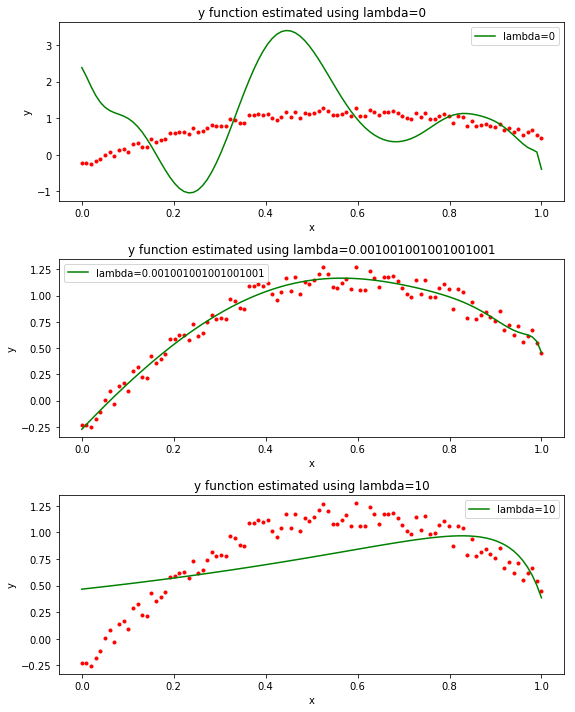

In [18]:

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
best_weights = []

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

    # keep the weights for 'best_lambda' so that we can analyse them later on.
    if(i==2):
        best_weights = weights
        
plt.show()


In [19]:
print("best_weights:", best_weights)

best_weights: [-2.74309709e-01  4.60900031e+00 -2.37921669e+00 -2.19289797e+00
 -7.08735159e-01  3.25769950e-01  7.50146457e-01  7.64530436e-01
  5.74952090e-01  3.20021449e-01  7.64565217e-02 -1.20760650e-01
 -2.61068161e-01 -3.46668971e-01 -3.85514336e-01 -3.87391745e-01
 -3.61907414e-01 -3.17560598e-01 -2.61417594e-01 -1.99097076e-01
 -1.34903233e-01 -7.20168162e-02 -1.26966304e-02  4.15320034e-02
  8.97119699e-02  1.31315244e-01  1.66129212e-01  1.94165959e-01
  2.15591381e-01  2.30670908e-01  2.39728809e-01  2.43118398e-01
  2.41200854e-01  2.34330707e-01  2.22846421e-01  2.07064790e-01
  1.87278123e-01  1.63753415e-01  1.36732898e-01  1.06435473e-01
  7.30586850e-02  3.67809844e-02 -2.23593561e-03 -4.38448335e-02
 -8.79107438e-02 -1.34308982e-01 -1.82923360e-01 -2.33644623e-01
 -2.86369104e-01 -3.40997595e-01 -3.97434411e-01]


In [20]:
print("best_lambda:{}".format(best_lambda))

best_lambda:0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function trend very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


### Possible algorithm improvement 
Please note that we should **hold back** a portion of the data set and use it to only **evaluate the final model**, which would provide an **unbiased evaluation of Eout**.  

So in terms of algorithm we should consider doing this: 

  * Split the data set between training set  and testing set (80/20 rule) 
  * Run the KFold on the training set to find the best lambda 
  * Once we have the best lambda and associated weights, we calculate Eout on the testing set that we had saved at step 1. 

More information regarding holding out a portion of the data set for evaluating the final model: https://machinelearningmastery.com/difference-test-validation-datasets/

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Rubric
  * Beginning: Incorrect use of LassoCV and Ridge CV.
  * Developing: Incorrect use of LassCV or RidgeCV.
  * Accomplished: LassoCV and RidgeCV used correctly. Valid commentary on difference in lambda obtained in Task 1,2.
  * Exemplary: Correct use of Lasso&RidgeCV. Valid commentary on lambda including insights in the differences with Task 1,2 relating to the ability to approximate Eout correctly.

References: 
  * https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
  * https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
    * Describes how RidgeVC and LassoCV perform better at reducting over-fitting compared to simple Linear regression. 

What is the difference between Ridge and RidgeCV?
  * https://stats.stackexchange.com/questions/262640/the-results-of-cv-on-ridge-are-different-than-the-results-of-ridgecv

In [21]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = title
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("score  :", score)
    print("params :", params)
    print("lambdas:", lambdas)
    print("coefs  :", coeffs)

## Ridge

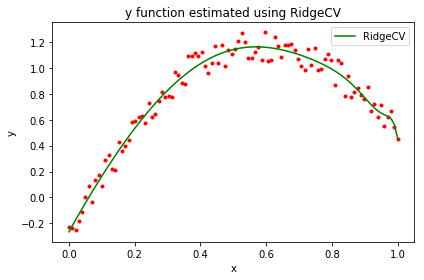

score  : 0.9686236418281109
params : <bound method BaseEstimator.get_params of RidgeCV(alphas=array([0.001, 0.002, ..., 0.999, 1.   ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.          4.53995346 -2.31609918 -2.1633019  -0.72440299  0.32953531
  0.77600416  0.78957796  0.58167952  0.30361088  0.04139664 -0.16588179
 -0.30739605 -0.38711513 -0.41545088 -0.40456711 -0.36600199 -0.30963955
 -0.24341608 -0.17339569 -0.10400801 -0.03833626  0.02160053  0.07459656
  0.12004832  0.15778385  0.18792843  0.21080162  0.22684     0.23654073
  0.24042141  0.2389925   0.23273938  0.22211151  0.20751677  0.18931957
  0.16784139  0.14336312  0.11612837  0.08634729  0.05420071  0.01984411
 -0.01658845 -0.05498082 -0.09523149 -0.13725073 -0.18095814 -0.22628045
 -0.27314975 -0.32150204 -0.37127593]


In [22]:
clf = RidgeCV(alphas=lambdas[1:]).fit(X_trans, y)

alternate_regression("RidgeCV", clf)

## Lasso

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


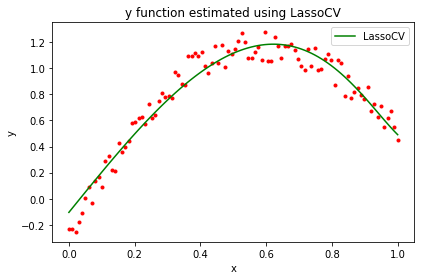

score  : 0.9482330954096657
params : <bound method BaseEstimator.get_params of LassoCV(alphas=array([0.   , 0.001, ..., 0.999, 1.   ]), copy_X=True, cv=10,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=0,
    selection='cyclic', tol=0.0001, verbose=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.00000000e+00  3.10718212e+00 -0.00000000e+00 -2.68069387e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.52023538e-03  9.96140608e-02  6.72797685e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00

In [23]:
clf = LassoCV(alphas=lambdas, cv=10, random_state=0).fit(X_trans, y)

alternate_regression("LassoCV", clf)

## Analysis

Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Lasso and Ridge are 2 different regularisers:

##### Ridge:
Ridge performs L2 regularization which adds a penalty equivalent to square of the magnitude of coefficients. L2 regularization has the effect of shrinking the weights which helps to reduce the model complexity. This can be clearly seen by the output of the coef_ parameters.

Ridge selected the following optimum lambda: **0.001001001001001001**.

##### Lasso:
Performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Lasso pushes a large number of weights to zero which results in simpler models. This can be clearly seen by the output of the coef_ parameters.

Lasso found the following optimum lambda: **0.001001001001001001**.

#### Ridge & Lasso compared to our own implementation
Here is what we notice when comparing the 3 regularization approaches:
  * The weights generated by our own algorithm are similar in value to the ones generated by Ridge's.
  * Ridge, Lasso, and our own algorithm, generally find **different values for lambda**, but on occasion, like here, they are **identical**.
  * Lambda is generally very small.

